# Airline Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
air = pd.read_csv(r"C:\Users\mohha\OneDrive\Desktop\Python FB\Python Project\Dataset\Airline Passenger Satisfaction  Analysis.csv")
air.head(10)
warnings.filterwarnings("ignore")

In [13]:
air.rename({"Unnamed: 0":"no."},axis=1,inplace=True)
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no.                                25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [14]:
air.nunique()

no.                                  25976
id                                   25976
Gender                                   2
Customer Type                            2
Age                                     75
Type of Travel                           2
Class                                    3
Flight Distance                       3281
Inflight wifi service                    6
Departure/Arrival time convenient        6
Ease of Online booking                   6
Gate location                            5
Food and drink                           6
Online boarding                          6
Seat comfort                             5
Inflight entertainment                   6
On-board service                         6
Leg room service                         6
Baggage handling                         5
Checkin service                          5
Inflight service                         6
Cleanliness                              6
Departure Delay in Minutes             313
Arrival Del

1.1 What is the distribution of flight classes (Economy, Business) and how do they correlate with satisfaction?

<Axes: xlabel='Class', ylabel='count'>

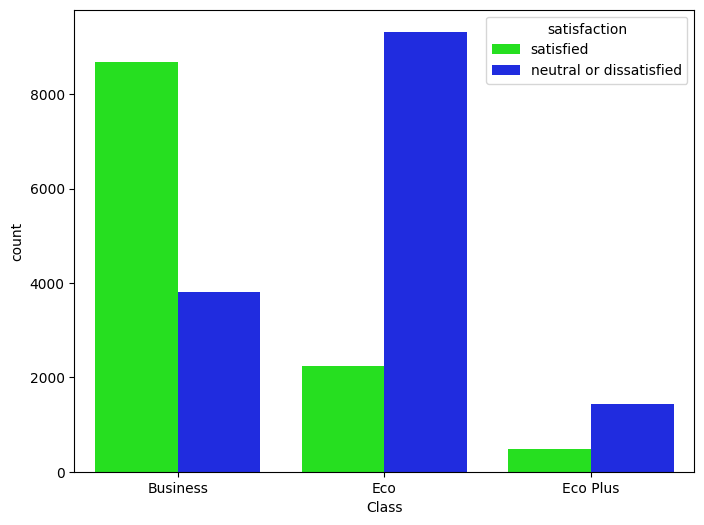

In [9]:
plt.figure(figsize=(8,6))
sat = air.groupby("Class")["satisfaction"].value_counts().reset_index()
# print("Dataset :\n",sat)
sns.barplot(sat,x="Class",y="count",hue="satisfaction",palette="hsv")

In [7]:
# Mostly Business class passengers give satisified review than others

1.2 What are the demographic trends (e.g., age, gender) of satisfied vs. dissatisfied passengers?

DataSet :
    Gender             satisfaction  count
0  Female  neutral or dissatisfied   7437
1  Female                satisfied   5735
2    Male  neutral or dissatisfied   7136
3    Male                satisfied   5668


<Axes: xlabel='satisfaction', ylabel='count'>

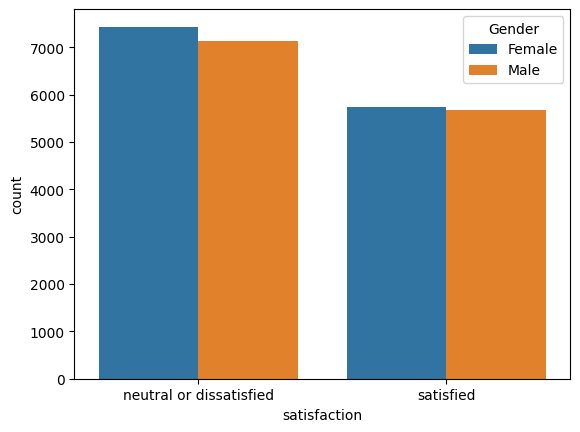

In [10]:
gen = air.groupby("Gender")["satisfaction"].value_counts().reset_index()
print("DataSet :\n",gen)
sns.barplot(gen,hue="Gender",y="count",x="satisfaction")

In [11]:
# In both the cases Female count is slightly higher than males

DataSet :
      Age             satisfaction  count
0      7  neutral or dissatisfied    114
1      7                satisfied      9
2      8  neutral or dissatisfied    145
3      8                satisfied     12
4      9  neutral or dissatisfied    137
..   ...                      ...    ...
145   79                satisfied      2
146   80  neutral or dissatisfied     16
147   80                satisfied     16
148   85  neutral or dissatisfied      5
149   85                satisfied      3

[150 rows x 3 columns]


<Axes: xlabel='Age', ylabel='count'>

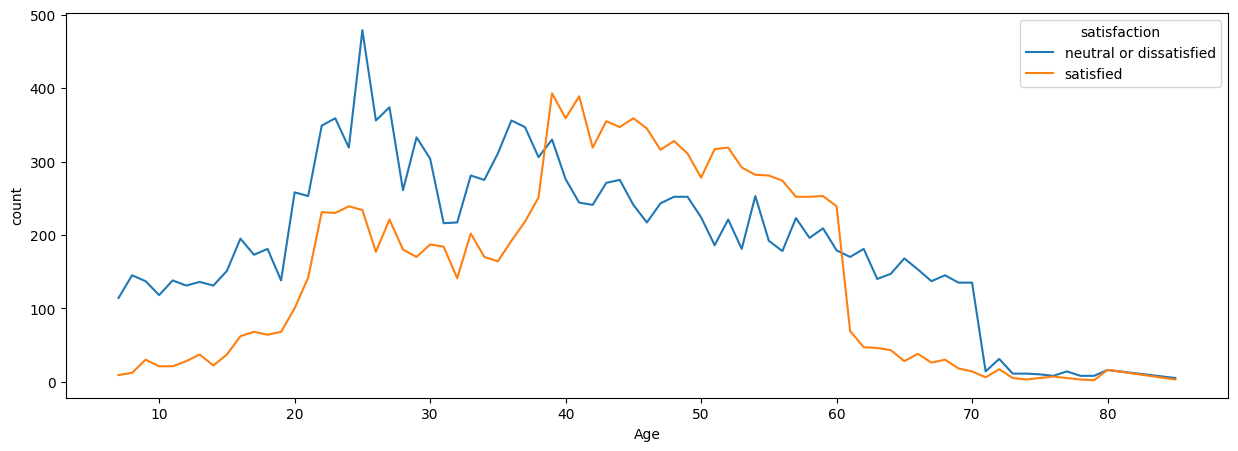

In [13]:
age = air.groupby("Age")["satisfaction"].value_counts().reset_index()
print("DataSet :\n",age)
plt.figure(figsize=(15,5))
sns.lineplot(age,hue="satisfaction",y="count",x="Age")

In [ ]:
# Count of satisfied passengers is higher than dissatisfied in the age of range 40 - 60 than others

1.3 What is the overall distribution of satisfaction among passengers (satisfied vs. dissatisfied)?

              satisfaction  proportion
0  neutral or dissatisfied   56.101786
1                satisfied   43.898214


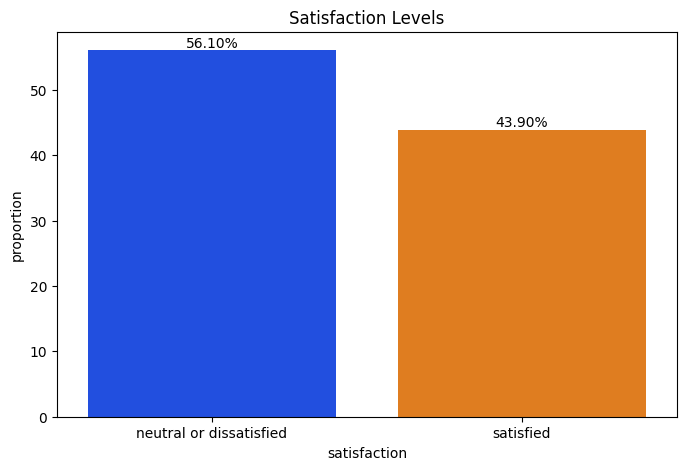

In [21]:
dt2=(air["satisfaction"].value_counts(normalize=True)*100).reset_index()
print(dt2)
plt.figure(figsize=(8, 5))
a1=sns.barplot(data=dt2, x="satisfaction", y="proportion",palette="bright")
for container in a1.containers:
    a1.bar_label(container, fmt="%.2f%%") 
plt.title("Satisfaction Levels")
plt.show()

In [ ]:
# 56.1 % passengers are not satisfied with services

2.1 Which services (e.g., inflight wifi, seat comfort, inflight entertainment) have the highest and lowest ratings?

Text(0.5, 1.0, 'Seat comfort')

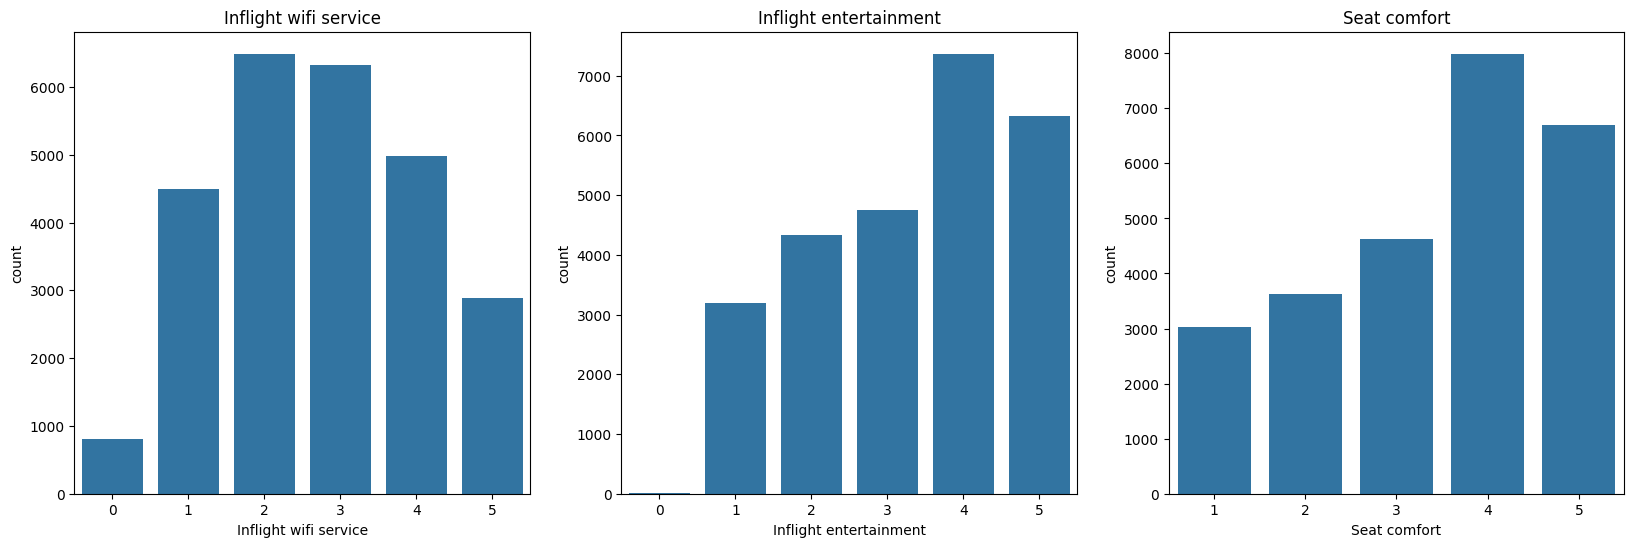

In [23]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
dt3=air["Inflight wifi service"].value_counts().reset_index()
sns.barplot(dt3,x="Inflight wifi service",y="count")
plt.title("Inflight wifi service")

plt.subplot(1, 3, 2)
dt4=air["Inflight entertainment"].value_counts().reset_index()
sns.barplot(dt4,x="Inflight entertainment",y="count")
plt.title("Inflight entertainment")

plt.subplot(1, 3, 3)
dt4=air["Seat comfort"].value_counts().reset_index()
sns.barplot(dt4,x="Seat comfort",y="count")
plt.title("Seat comfort")

In [ ]:
# Inflight wifi service  - 2 & 3 highest
# Inflight entertainment - 4 & 5 highest   
# Seat comfort           - 4 & 5 highest  
# In all services        - 1 & 0 lowest

2.2 Do passengers who rate the inflight wifi service higher also report higher satisfaction levels?

In [25]:
dt5 = air[(air["Inflight wifi service"] >= 4) & (air["satisfaction"] == "satisfied")]
dt5

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
10,10,47583,Female,Loyal Customer,47,Business travel,Eco,1235,4,1,...,3,3,4,3,1,3,4,29,19.0,satisfied
12,12,119987,Female,Loyal Customer,46,Business travel,Business,1009,5,5,...,5,5,5,5,5,5,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25949,25949,37905,Male,disloyal Customer,56,Business travel,Eco,668,5,0,...,2,4,3,3,4,5,2,0,0.0,satisfied
25950,25950,111771,Female,Loyal Customer,52,Business travel,Business,1620,4,4,...,4,4,4,4,4,4,5,30,26.0,satisfied
25953,25953,27759,Female,Loyal Customer,43,Business travel,Business,1448,4,1,...,5,5,5,5,5,5,2,0,0.0,satisfied
25956,25956,109108,Female,Loyal Customer,29,Business travel,Business,2864,5,5,...,3,5,5,5,3,5,3,0,0.0,satisfied


2.3 How do departure and arrival delays impact passenger satisfaction?

<Axes: xlabel='Arrival Delay in Minutes', ylabel='count'>

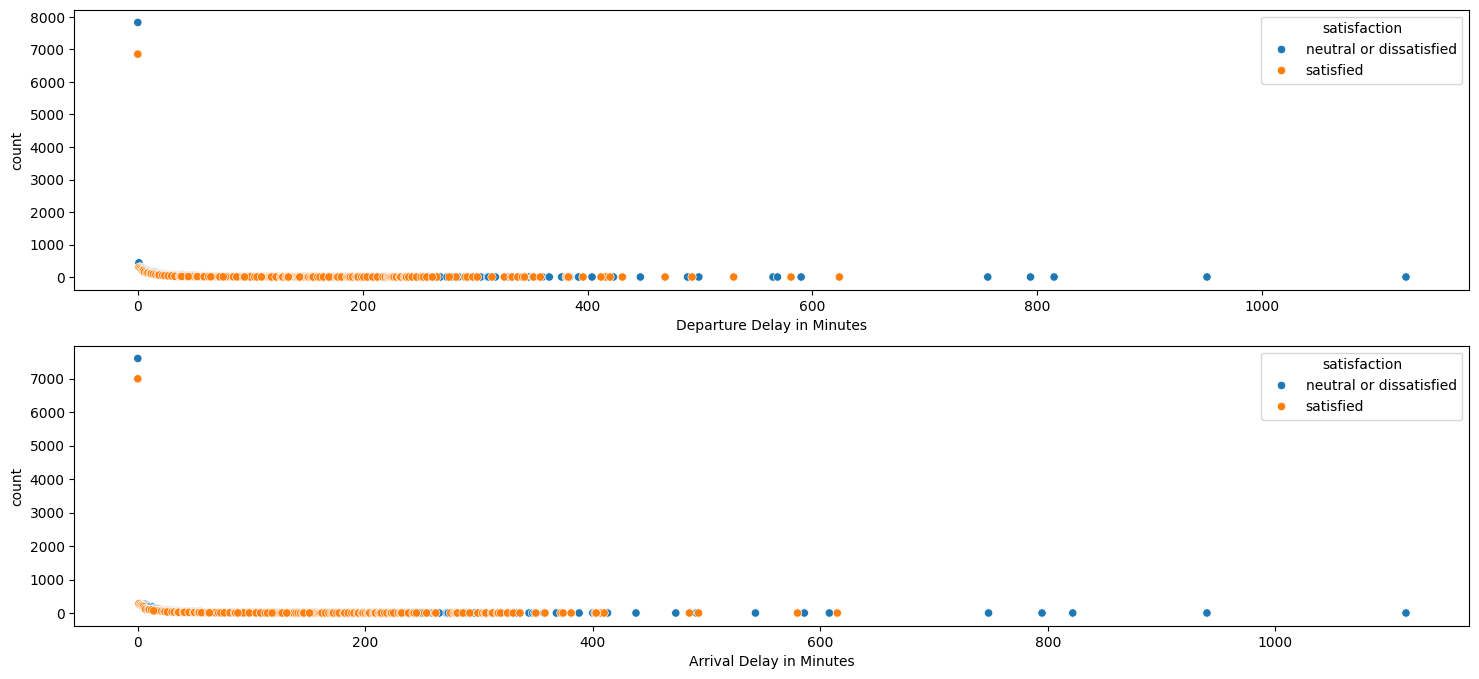

In [30]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 1, 1)
dely = air.groupby("satisfaction")["Departure Delay in Minutes"].value_counts().reset_index()
sns.scatterplot(dely,hue="satisfaction",y="count",x="Departure Delay in Minutes")

plt.subplot(2, 1, 2)
ar = air.groupby("satisfaction")["Arrival Delay in Minutes"].value_counts().reset_index()
sns.scatterplot(ar,hue="satisfaction",y="count",x="Arrival Delay in Minutes")

In [ ]:
# In both types of delay passengers satisfied & dissatisfied eventhough dely is 0 minutes, also we have very less count passengers when delay occour

3.1 How does satisfaction vary between different classes (Economy, Business)?

<Axes: xlabel='Class', ylabel='count'>

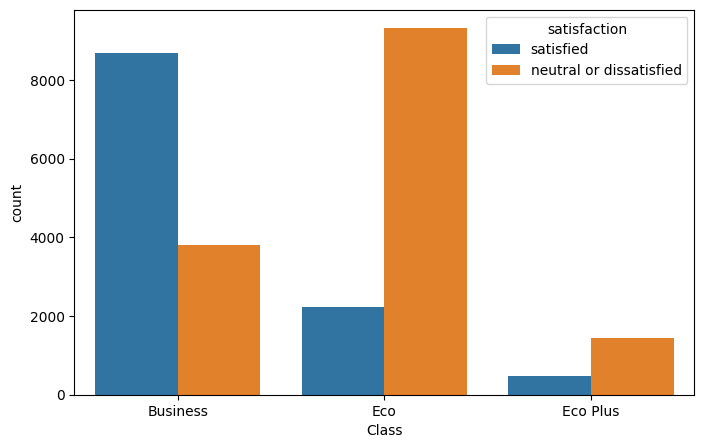

In [55]:
plt.figure(figsize=(8, 5))
dm = air.groupby("Class")["satisfaction"].value_counts().reset_index()
sns.barplot(dm,x="Class",y="count",hue="satisfaction")

In [ ]:
# Huge count of passengers satisfied with Business class, in Others Dissatisfaction count is high

3.2 Are business travelers generally more satisfied than leisure travelers? Use bar charts or heatmaps to compare satisfaction levels across different types of travel.

<Axes: xlabel='Type of Travel', ylabel='count'>

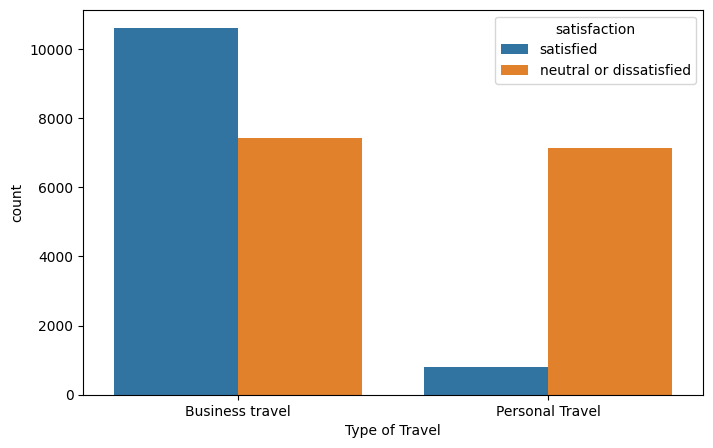

In [56]:
plt.figure(figsize=(8, 5))
trvl = air.groupby("Type of Travel")["satisfaction"].value_counts().reset_index()
sns.barplot(trvl,x="Type of Travel",y="count",hue="satisfaction")

In [ ]:
# Yes, business travelers generally more satisfied than leisure travelers

4.1 What is the average delay for both satisfied and dissatisfied passengers?

Text(0.5, 1.0, 'Average Arrival Delay')

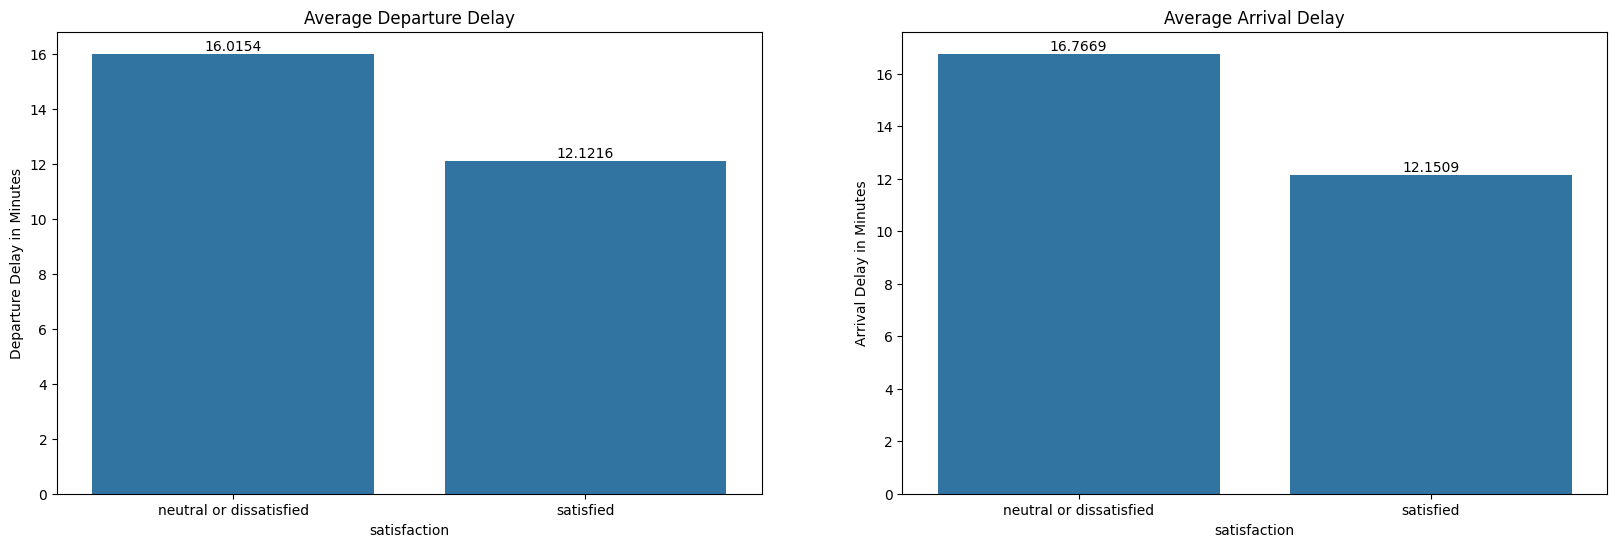

In [23]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
trd = air.groupby("satisfaction")["Departure Delay in Minutes"].mean().reset_index()
o3=sns.barplot(trd,y="Departure Delay in Minutes",x="satisfaction")
for container in o3.containers:
    o3.bar_label(container) 
plt.title("Average Departure Delay")

plt.subplot(1, 2, 2)
trda = air.groupby("satisfaction")["Arrival Delay in Minutes"].mean().reset_index()
o4=sns.barplot(trda,y="Arrival Delay in Minutes",x="satisfaction")
for container in o4.containers:
    o4.bar_label(container) 
plt.title("Average Arrival Delay")

4.2 Does a higher departure or arrival delay significantly reduce passenger satisfaction?

<Axes: xlabel='Arrival Delay in Minutes', ylabel='count'>

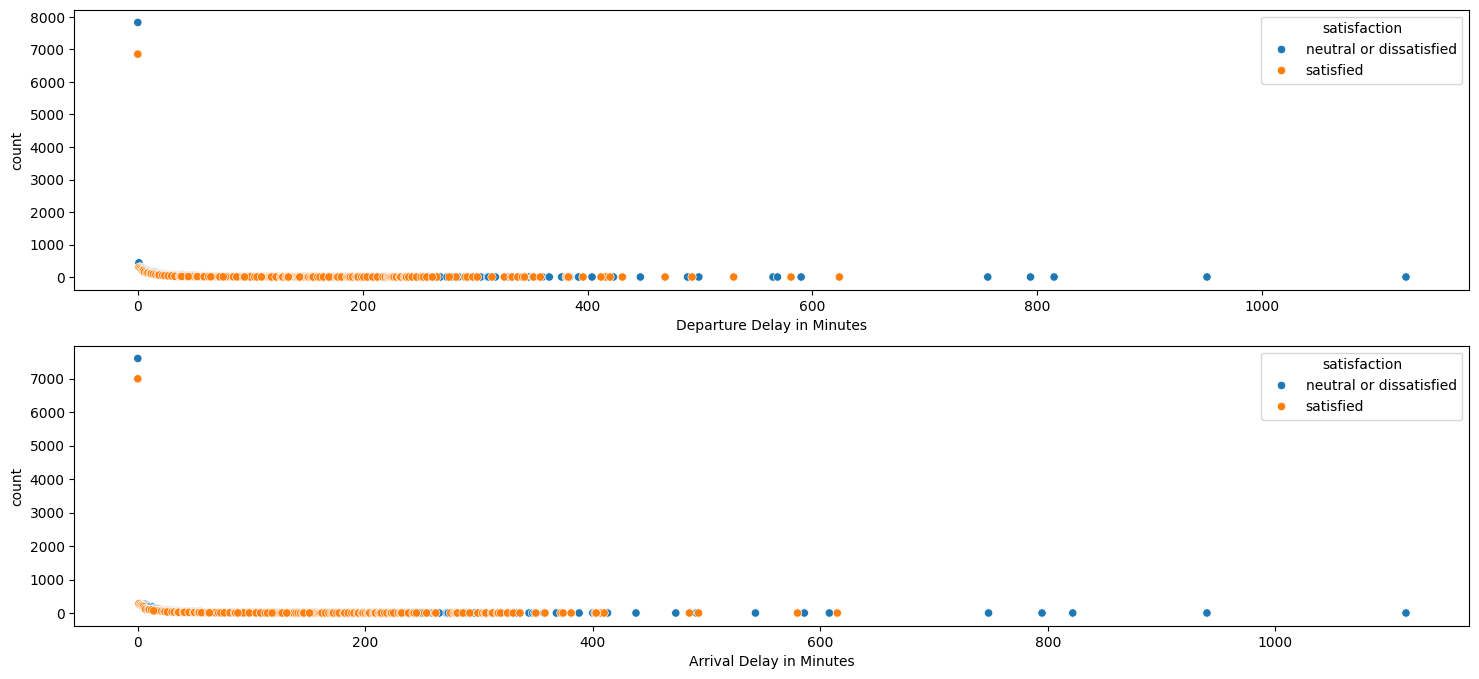

In [36]:
plt.figure(figsize=(18, 8))

plt.subplot(2, 1, 1)
dely = air.groupby("satisfaction")["Departure Delay in Minutes"].value_counts().reset_index()
sns.scatterplot(dely,hue="satisfaction",y="count",x="Departure Delay in Minutes")

plt.subplot(2, 1, 2)
ar = air.groupby("satisfaction")["Arrival Delay in Minutes"].value_counts().reset_index()
sns.scatterplot(ar,hue="satisfaction",y="count",x="Arrival Delay in Minutes")

In [29]:
# We have few no. of passenges that satisfied by a dely under 400 min, 
# but after 400 min delay most passengers are dissatisfied. 
# Also we have huge no. of passengers satisfied & dissatisfied eventhough dely is 0 minutes,

5.1 Are loyal customers more satisfied than first-time flyers?

Text(0.5, 1.0, 'Customer satisfaction')

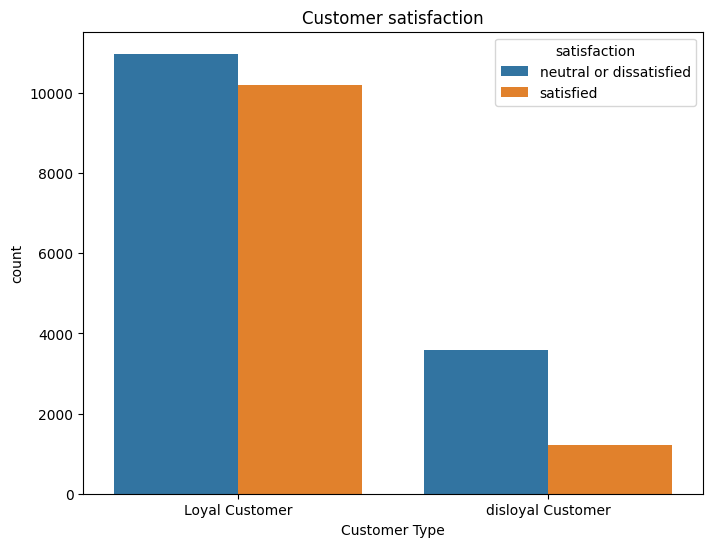

In [79]:
plt.figure(figsize=(8, 6))
tr45 = air.groupby("Customer Type")["satisfaction"].value_counts().reset_index()
sns.barplot(tr45,x="Customer Type",y="count",hue="satisfaction")
plt.title("Customer satisfaction")

In [31]:
# Yes, loyal customers more satisfied than first-time flyers

5.2 How do different age groups and genders rate their flight experiences? Visualize the trends using histograms or boxplots.

Text(0.5, 1.0, 'Online booking Experiance')

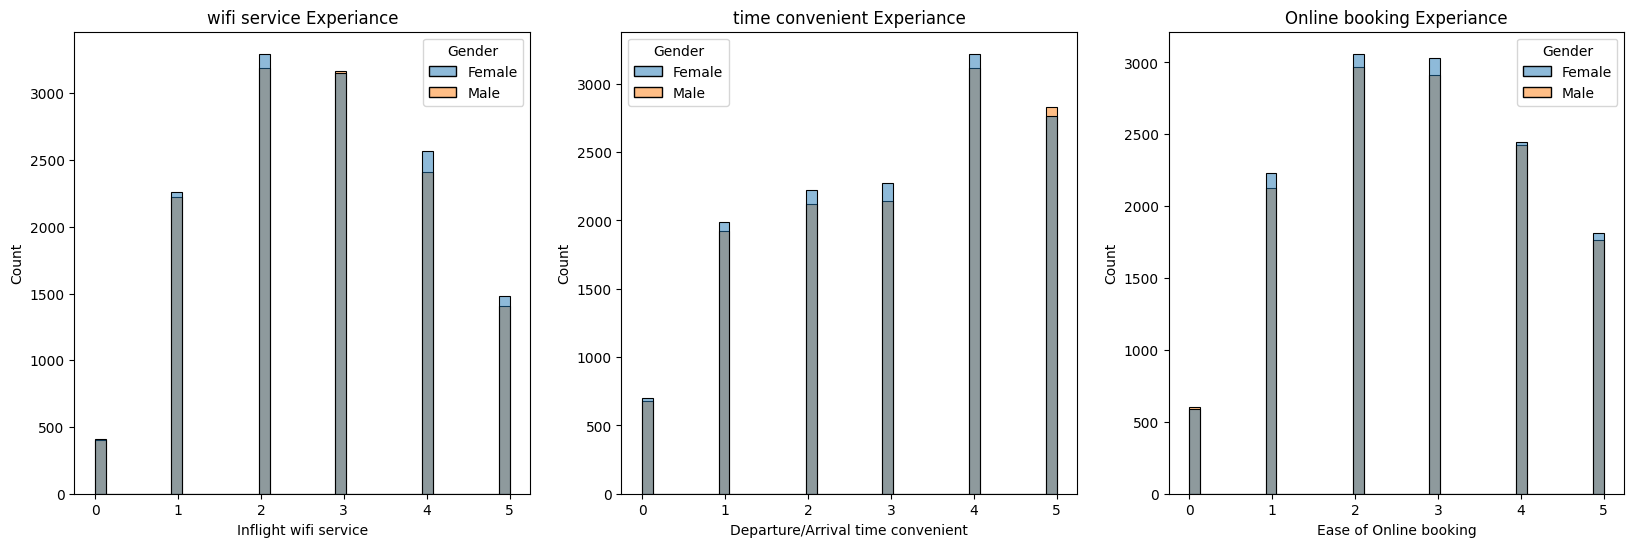

In [33]:
# flight experiences by Gender
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.histplot(air,x="Inflight wifi service",hue="Gender")
plt.title("wifi service Experiance")
plt.subplot(1, 3, 2)
sns.histplot(air,x="Departure/Arrival time convenient",hue="Gender")
plt.title("time convenient Experiance")
plt.subplot(1, 3, 3)
sns.histplot(air,x="Ease of Online booking",hue="Gender")
plt.title("Online booking Experiance")

Text(0.5, 1.0, 'Online booking Experiance')

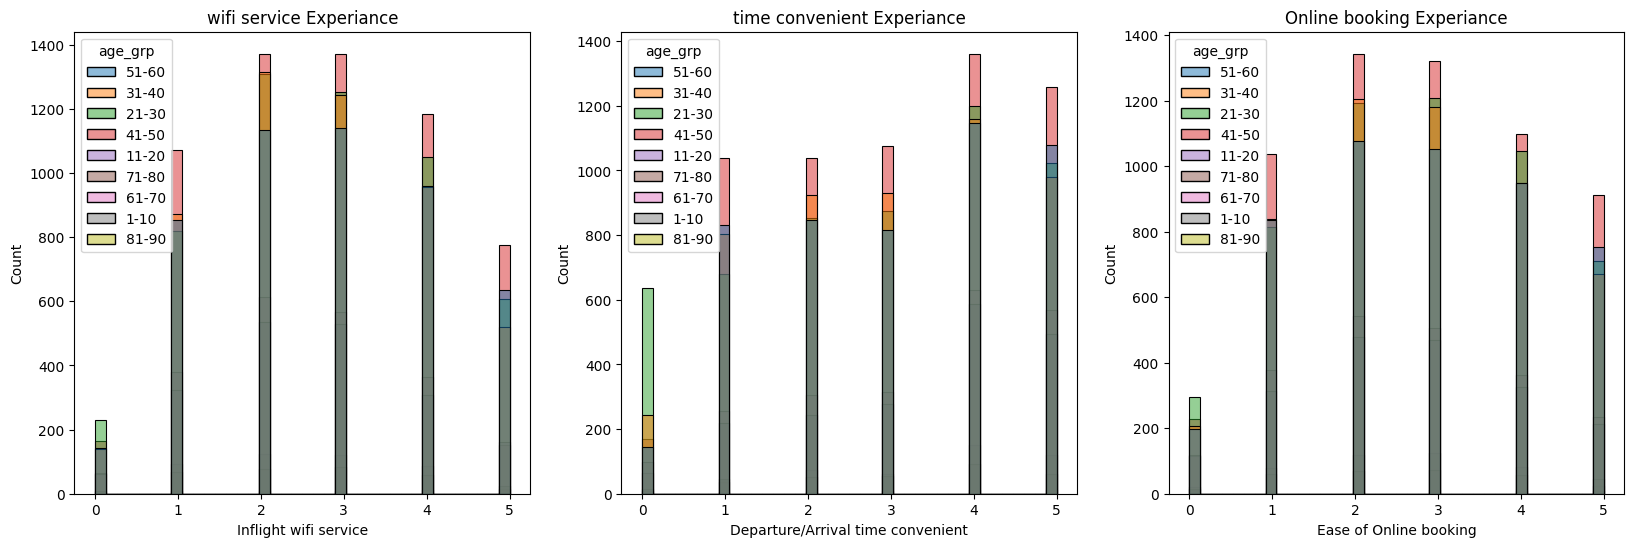

In [ ]:
# flight experiences by Age Group
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.histplot(air,x="Inflight wifi service",hue="age_grp")
plt.title("wifi service Experiance")
plt.subplot(1, 3, 2)
sns.histplot(air,x="Departure/Arrival time convenient",hue="age_grp")
plt.title("time convenient Experiance")
plt.subplot(1, 3, 3)
sns.histplot(air,x="Ease of Online booking",hue="age_grp")
plt.title("Online booking Experiance")

6.1 Based on your findings, what improvements can airlines make to enhance passenger satisfaction?

In [ ]:
# Since Wi-Fi is a critical amenity for many passengers, ensuring reliable and fast internet connectivity can significantly enhance satisfaction.
# Evaluate the quality and variety of food and beverages. If satisfaction with food and drinks is low, offer more customizable or higher-quality options.
# Modernize entertainment systems, provide more content options, and improve usability for a better customer experience.
# Many passengers prioritize comfortable seating, especially on long-haul flights. Investing in better seats (legroom, cushioning, and recline features) can be impactful.
# Streamline the check-in and boarding process with efficient online systems. Invest in mobile-friendly apps and self-service kiosks for minimal wait times.
# Improving maintenance schedules for better on-time performance.
# Offering better communication during delays and compensating affected passengers to mitigate dissatisfaction.
# Invest in reliable baggage systems to reduce lost or delayed baggage incidents.
# Business travelers value time efficiency, Wi-Fi, and streamlined processes.
# Leisure travelers prioritize comfort, food, and inflight entertainment.

6.2 Suggest ways to improve specific services (e.g., inflight wifi, seat comfort) that correlate with lower satisfaction ratings.

In [ ]:
# Partner with providers that offer satellite-based internet (e.g., Viasat, Gogo) for better coverage and faster speeds.
# Regularly analyze Wi-Fi performance metrics (e.g., downtime, latency) and adjust capacity based on flight routes and passenger demand.
# For economy class, consider slightly increasing the pitch (distance between rows) and width to reduce the feeling of crowding.
# Offer adjustable headrests and lumbar support in all classes.
# Use staggered seat configurations to improve perceived legroom without reducing total capacity.
# Partner with major streaming platforms to provide more diverse entertainment options (e.g., Netflix, Spotify).
# Allow passengers to stream entertainment directly to their devices via onboard Wi-Fi.
# Introduce more fresh and healthy meals, including vegetarian, vegan, and gluten-free choices.
# Add local or seasonal dishes on specific routes for a more engaging dining experience.
# Notify passengers about delays well in advance and offer alternative options (e.g., rebooking or upgrades).
# Allow passengers to track their baggage using a mobile app or RFID tags.
# Deploy kiosks at airports to reduce queues for passengers who prefer physical boarding passes.